# 01. Analysis Seoul CCTV

In [1]:
import pandas as pd

## CCTV 데이터 읽기

In [43]:
#데이터 읽기
CCTV_Seoul = pd.read_csv("../data/01. Seoul_CCTV.csv", encoding = "cp949")
CCTV_Seoul.head()
#read_csv 했을 때 UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc0 in position 0: invalid start byte
#와 같은 에러가 떴음
#https://jonhyuk0922.tistory.com/232
#위 사이트를 보고 'cp949'로 인코딩했을때 문제 없이 테이블을 볼 수 있었음.

,구분,총계,2013년 이전 설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
0,계,"91,341","2,804","3,097","3,981","6,576","8,850","11,566","11,024","13,151","11,912","9,144","9,236"
1,종로구,"1,980",36,540,107,161,131,158,152,69,250,85,291
2,중 구,"2,584",130,87,77,236,240,372,386,155,361,403,137
3,용산구,"2,847",44,50,68,83,295,491,115,322,623,422,334
4,성동구,"4,047",58,99,110,366,279,945,459,647,485,367,232


In [44]:
#데이터 컬럼명 보기
CCTV_Seoul.columns

Index(['구분', '총계', '2013년 이전 설치된 CCTV', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년', '2020년', '2021년', '2022년'],
      dtype='object')

In [45]:
#컬럼명 선택
CCTV_Seoul.columns[0]

'구분'

In [46]:
#컬렴명 변경 
#데이터프레임명.rename(columns = {변경할 컬럼명 : "변경 내용"), inplace = True)
#inplace = True 옵션을 해줘야 원본 데이터프레임에 변경이 적용됨.

CCTV_Seoul.rename(columns = {CCTV_Seoul.columns[0] : "구별"}, inplace = True)
CCTV_Seoul.head()

,구별,총계,2013년 이전 설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
0,계,"91,341","2,804","3,097","3,981","6,576","8,850","11,566","11,024","13,151","11,912","9,144","9,236"
1,종로구,"1,980",36,540,107,161,131,158,152,69,250,85,291
2,중 구,"2,584",130,87,77,236,240,372,386,155,361,403,137
3,용산구,"2,847",44,50,68,83,295,491,115,322,623,422,334
4,성동구,"4,047",58,99,110,366,279,945,459,647,485,367,232


## 인구수 데이터 읽기

In [4]:
pop_Seoul = pd.read_excel("../data/01. Seoul_Population.xlsx")
pop_Seoul.head()

C:\Users\nabi4\anaconda3\envs\ds_study\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,동별(1),동별(2),2023 1/4,2023 1/4.1,2023 1/4.2,2023 1/4.3,2023 1/4.4,2023 1/4.5,2023 2/4,2023 2/4.1,2023 2/4.2,2023 2/4.3,2023 2/4.4
0,동별(1),동별(2),세대 (세대),계 (명),한국인 (명),등록외국인 (명),세대당인구 (명),65세이상고령자 (명),세대 (세대),계 (명),한국인 (명),등록외국인 (명),인구밀도
1,합계,소계,4463385,9668008,9426404,241604,2.11,1690961,4469158,9659322,9414093,245229,2
2,NaN,종로구,72679,152212,141060,11152,1.94,28265,72507,151349,140397,10952,2
3,NaN,중구,63862,131390,120963,10427,1.89,25353,64375,132054,121441,10613,2
4,NaN,용산구,109735,232482,217756,14726,1.98,39478,109679,232069,217288,14781,2


In [ ]:
#데이터프레임이 지저분함.
#원본 파일을 열어서 확인한 후 내가 원하는대로 데이터 추출해주기
#자치구명, 인구수 합계, 한국인 인구수 합계, 등록 외국인 인구수 합계, 65세 이상 고령자 수 

In [5]:
pop_Seoul = pd.read_excel(
    "../data/01. Seoul_Population.xlsx", header = 1, usecols = "B,D,E,F,H"
)
pop_Seoul.head()

C:\Users\nabi4\anaconda3\envs\ds_study\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,동별(2),계 (명),한국인 (명),등록외국인 (명),65세이상고령자 (명)
0,소계,9668008,9426404,241604,1690961
1,종로구,152212,141060,11152,28265
2,중구,131390,120963,10427,25353
3,용산구,232482,217756,14726,39478
4,성동구,287240,280240,7000,48238


In [6]:
# 컬럼명 변경
pop_Seoul.rename(
    columns = {
        pop_Seoul.columns[0] : "구별",
        pop_Seoul.columns[1] : "인구수",
        pop_Seoul.columns[2] : "한국인",
        pop_Seoul.columns[3] : "외국인",
        pop_Seoul.columns[4] : "고령자"
    },
    inplace = True
)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,소계,9668008,9426404,241604,1690961
1,종로구,152212,141060,11152,28265
2,중구,131390,120963,10427,25353
3,용산구,232482,217756,14726,39478
4,성동구,287240,280240,7000,48238


---

## Pandas 기초
- Python에서 R 만큼의 강력한 데이터 핸들링 성능을 제공하는 모듈
- 단일 프로세스에서는 최대 효율
- 코딩 가능하고 응용 가능한 엑셀로 받아들여도 됨
- 누군가 스테로이드를 맞은 엑셀로 표현함

#### Series
- index와 value 로 이루어져 있음
- 한가지 데이터 타입만 가질 수 있음 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd.Series([1,2,3,4]) #데이터를 직접 만들 수 있음

In [ ]:
pd.Series([1,2,3,4], dtype = np.float64) #데이터형을 정할 수도 있음(자세한 내용은 공식문서 참고) 

In [ ]:
pd.Series([1,2,3,4, "5"]) 

#### 날짜 데이터 

In [ ]:
date = pd.date_range("2023-07-28", periods = 6) #원하는 기간 만큼의 날짜 생성 가능

### DataFrame
- pd.Series()
    - index, value
- pd.DataFrame()
    - index, value, column

In [ ]:
#표준 정규분포에서 샘플링한 난수 생성
data = np.random.rand(6,4)
data

In [ ]:
df = pd.DataFrame(data, index = date, columns = ["A", "B", "C", "D"])
df

### 데이터프레임 정보 탐색

In [ ]:
df.head()

#### 데이터 인덱스, 컬럼명, 값 확인

In [ ]:
df.index

In [ ]:
df.columns

In [ ]:
df.values

In [ ]:
df.info() #데이터 프레임 정보 확인

In [ ]:
df.describe() #데이터 프레임 기술통계 정보 확인

#### 데이터 정렬

In [ ]:
df.sort_values(by = "B")#특정 컬럼을 기준으로 데이터 정렬
#ascending = False 내림차순 정렬
#inplace = True 원본 데이터에 저장

#### 데이터 선택

In [ ]:
#한 개 컬럼 선택
df['A'] #컬럼명이 문자열인 경우 df.A 로도 선택 가능

In [ ]:
type(df["A"])

In [ ]:
#두 개 이상 컬럼 선택
df[["A", "B"]]

### offset index
- [n:m] : n부터 m-1까지
- 인덱스나 컬럼명으로 slice하는 경우는 끝까지 포함

In [ ]:
df

In [ ]:
df[0:3]

In [ ]:
df["2023-07-28":"2023-07-31"]

- loc : location
- index 이름으로 특정 행, 열 선택

In [ ]:
df.loc[:, ["A" , "B"]] #행, 열

In [ ]:
df.loc["2023-07-28":"2023-07-31", ["A", "C"]]

In [ ]:
df.loc["2023-07-28":"2023-07-31", "A":"C"]

- iloc : integer location
    - 컴퓨터가 인식하는 인덱스 값으로 선택

In [ ]:
df

In [ ]:
df.iloc[3] #행

In [ ]:
df.iloc[3,2] #행, 열

In [ ]:
df.iloc[3:5, 0:2]

### condition

In [ ]:
df

In [ ]:
# A 컬럼에서 양수만 선택
df["A"] > 0

In [ ]:
df[df["A"] > 0]

#### 컬럼 추가
- 기존 컬럼이 있으면 변경, 없으면 추가하는 방식

In [ ]:
df

In [ ]:
df["E"] = ["one", "two", "three", "four", "five", "six"]
df

- isin()
    특정 요소가 있는지 확인

In [ ]:
df["E"] .isin(["two", "four"])

In [ ]:
df[df["E"] .isin(["two", "four"])] #특정 조건에 맞는 행만 추출

#### 특정 컬럼 제거
- del
- drop

In [ ]:
df

In [ ]:
del df["E"] #원본 데이터까지 삭제해버림
df

In [ ]:
#그에 반해, drop은 원본 데이터까지 삭제하진 않음
df.drop(["D"], axis = 1) #axis = 0 가로, axis = 1세로

In [ ]:
df.drop(["2023-08-02"])

#### apply()
괄호 안에 들어가는 함수를 데이터프레임에 적용시켜줌

In [ ]:
df

In [ ]:
df["A"].apply("sum")

In [ ]:
df["A"].apply("min") , df["A"].apply('max')

In [ ]:
df[["A", "D"]].apply("sum")

In [ ]:
df["A"].apply(np.sum)

In [ ]:
def plusminus(num): #사용자 함수를 집어넣어 데이터프레임을 변환시킬 수도 있음
    return "plus" if num > 0 else "minus"

In [ ]:
df["A"].apply(plusminus)

In [ ]:
df["A"].apply(lambda num : "plus" if num > 0 else "minus" )

### 2. CCTV 데이터 훑어보기

In [47]:
CCTV_Seoul.head()

,구별,총계,2013년 이전 설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
0,계,"91,341","2,804","3,097","3,981","6,576","8,850","11,566","11,024","13,151","11,912","9,144","9,236"
1,종로구,"1,980",36,540,107,161,131,158,152,69,250,85,291
2,중 구,"2,584",130,87,77,236,240,372,386,155,361,403,137
3,용산구,"2,847",44,50,68,83,295,491,115,322,623,422,334
4,성동구,"4,047",58,99,110,366,279,945,459,647,485,367,232


In [48]:
#'계' 행 삭제
CCTV_Seoul = CCTV_Seoul.drop([0], axis = 0)
CCTV_Seoul.head()

,구별,총계,2013년 이전 설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
1,종로구,"1,980",36,540,107,161,131,158,152,69,250,85,291
2,중 구,"2,584",130,87,77,236,240,372,386,155,361,403,137
3,용산구,"2,847",44,50,68,83,295,491,115,322,623,422,334
4,성동구,"4,047",58,99,110,366,279,945,459,647,485,367,232
5,광진구,"3,480",507,82,84,64,21,465,443,709,172,662,271


In [49]:
#CCTV를 가장 적게 보유한 구 3개
CCTV_Seoul.sort_values(by= "총계", ascending = True).head(3)

,구별,총계,2013년 이전 설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
1,종로구,"1,980",36,540,107,161,131,158,152,69,250,85,291
10,도봉구,"2,247",103,2,79,72,103,117,200,202,183,600,586
2,중 구,"2,584",130,87,77,236,240,372,386,155,361,403,137


In [50]:
CCTV_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   구별                 25 non-null     object
 1   총계                 25 non-null     object
 2   2013년 이전 설치된 CCTV  25 non-null     object
 3   2013년              25 non-null     object
 4   2014년              25 non-null     object
 5   2015년              25 non-null     object
 6   2016년              25 non-null     object
 7   2017년              25 non-null     object
 8   2018년              25 non-null     object
 9   2019년              25 non-null     object
 10  2020년              25 non-null     object
 11  2021년              25 non-null     object
 12  2022년              25 non-null     object
dtypes: object(13)
memory usage: 2.7+ KB


In [25]:
CCTV_Seoul = CCTV_Seoul.astype({'총계' : 'float'})
CCTV_Seoul
#총계에 있는 쉼표때문에 숫자형으로 변환을 못함

ValueError: could not convert string to float: '1,980'

In [51]:
#쉼표 없애주기
CCTV_Seoul['총계'] = CCTV_Seoul['총계'].str.replace(',','')
CCTV_Seoul.head()

,구별,총계,2013년 이전 설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
1,종로구,1980,36,540,107,161,131,158,152,69,250,85,291
2,중 구,2584,130,87,77,236,240,372,386,155,361,403,137
3,용산구,2847,44,50,68,83,295,491,115,322,623,422,334
4,성동구,4047,58,99,110,366,279,945,459,647,485,367,232
5,광진구,3480,507,82,84,64,21,465,443,709,172,662,271


In [52]:
CCTV_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   구별                 25 non-null     object
 1   총계                 25 non-null     object
 2   2013년 이전 설치된 CCTV  25 non-null     object
 3   2013년              25 non-null     object
 4   2014년              25 non-null     object
 5   2015년              25 non-null     object
 6   2016년              25 non-null     object
 7   2017년              25 non-null     object
 8   2018년              25 non-null     object
 9   2019년              25 non-null     object
 10  2020년              25 non-null     object
 11  2021년              25 non-null     object
 12  2022년              25 non-null     object
dtypes: object(13)
memory usage: 2.7+ KB


In [53]:
CCTV_Seoul['2013년 이전 설치된 CCTV'] = CCTV_Seoul['2013년 이전 설치된 CCTV'].str.replace(',','')
CCTV_Seoul['2013년'] = CCTV_Seoul['2013년'].str.replace(',','')
CCTV_Seoul['2014년'] = CCTV_Seoul['2014년'].str.replace(',','')
CCTV_Seoul['2015년'] = CCTV_Seoul['2015년'].str.replace(',','')
CCTV_Seoul['2016년'] = CCTV_Seoul['2016년'].str.replace(',','')
CCTV_Seoul['2017년'] = CCTV_Seoul['2017년'].str.replace(',','')
CCTV_Seoul['2018년'] = CCTV_Seoul['2018년'].str.replace(',','')
CCTV_Seoul['2019년'] = CCTV_Seoul['2019년'].str.replace(',','')
CCTV_Seoul['2020년'] = CCTV_Seoul['2020년'].str.replace(',','')
CCTV_Seoul['2021년'] = CCTV_Seoul['2021년'].str.replace(',','')
CCTV_Seoul['2022년'] = CCTV_Seoul['2022년'].str.replace(',','')

In [54]:
CCTV_Seoul = CCTV_Seoul.astype(
    {
        '2013년 이전 설치된 CCTV' : 'int',
        '2013년' : 'int',
        '2014년' : 'int',
        '2015년' : 'int',
        '2016년' : 'int',
        '2017년' : 'int',
        '2018년' : 'int',
        '2019년' : 'int',
        '2020년' : 'int',
        '2021년' : 'int',
        '2022년' : 'int',
    })
CCTV_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   구별                 25 non-null     object
 1   총계                 25 non-null     object
 2   2013년 이전 설치된 CCTV  25 non-null     int32 
 3   2013년              25 non-null     int32 
 4   2014년              25 non-null     int32 
 5   2015년              25 non-null     int32 
 6   2016년              25 non-null     int32 
 7   2017년              25 non-null     int32 
 8   2018년              25 non-null     int32 
 9   2019년              25 non-null     int32 
 10  2020년              25 non-null     int32 
 11  2021년              25 non-null     int32 
 12  2022년              25 non-null     int32 
dtypes: int32(11), object(2)
memory usage: 1.6+ KB


In [55]:
CCTV_Seoul["최근증가율"] = (
    (CCTV_Seoul["2022년"] + CCTV_Seoul["2021년"] + CCTV_Seoul["2020년"]) / 
    (CCTV_Seoul["2019년"] + CCTV_Seoul["2018년"] + CCTV_Seoul["2017년"]) * 100
)
CCTV_Seoul.sort_values(by = "최근증가율", ascending = False).head()

,구별,총계,2013년 이전 설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,최근증가율
10,도봉구,2247,103,2,79,72,103,117,200,202,183,600,586,263.776493
1,종로구,1980,36,540,107,161,131,158,152,69,250,85,291,165.171504
3,용산구,2847,44,50,68,83,295,491,115,322,623,422,334,148.599138
19,영등포구,4553,109,81,295,360,285,422,803,153,1357,329,359,148.403483
25,강동구,3190,82,195,56,174,226,351,379,362,635,301,429,125.000000


## 3. 인구현황 데이터 훑어보기

In [56]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,소계,9668008,9426404,241604,1690961
1,종로구,152212,141060,11152,28265
2,중구,131390,120963,10427,25353
3,용산구,232482,217756,14726,39478
4,성동구,287240,280240,7000,48238


In [57]:
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,502628,487815,14813,83420
22,서초구,408979,404831,4148,63328
23,강남구,537817,532798,5019,83097
24,송파구,663704,658006,5698,105161
25,강동구,464027,459982,4045,79706


In [58]:
pop_Seoul.drop([0], axis = 0, inplace = True) #소계 행 삭제
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,152212,141060,11152,28265
2,중구,131390,120963,10427,25353
3,용산구,232482,217756,14726,39478
4,성동구,287240,280240,7000,48238
5,광진구,350925,336801,14124,54854


In [59]:
pop_Seoul["구별"].unique() #데이터의 고유한 값 추출

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [60]:
len(pop_Seoul["구별"].unique())

25

In [61]:
#외국인 비율, 고령자 비율
pop_Seoul["외국인비율"] = pop_Seoul["외국인"] / pop_Seoul["인구수"] * 100
pop_Seoul["고령자비율"] = pop_Seoul["고령자"] / pop_Seoul["인구수"] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,152212,141060,11152,28265,7.326623,18.569495
2,중구,131390,120963,10427,25353,7.935916,19.295989
3,용산구,232482,217756,14726,39478,6.334254,16.981100
4,성동구,287240,280240,7000,48238,2.436986,16.793622
5,광진구,350925,336801,14124,54854,4.024792,15.631260


In [62]:
pop_Seoul.sort_values(["인구수"], ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,663704,658006,5698,105161,0.858515,15.844563
16,강서구,573711,568287,5424,98659,0.945424,17.196637
23,강남구,537817,532798,5019,83097,0.933217,15.450795
11,노원구,506989,502515,4474,93279,0.882465,18.398624
21,관악구,502628,487815,14813,83420,2.947110,16.596767


In [63]:
pop_Seoul.sort_values(["외국인비율"], ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
2,중구,131390,120963,10427,25353,7.935916,19.295989
1,종로구,152212,141060,11152,28265,7.326623,18.569495
3,용산구,232482,217756,14726,39478,6.334254,16.981100
19,영등포구,398999,376614,22385,66014,5.610290,16.544904
17,구로구,417983,395183,22800,77259,5.454767,18.483766


In [64]:
pop_Seoul.sort_values(["고령자비율"], ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,296934,292762,4172,67056,1.405026,22.582796
10,도봉구,312858,310509,2349,68114,0.750820,21.771539
7,중랑구,389928,385003,4925,76116,1.263054,19.520527
12,은평구,468766,464871,3895,90556,0.830905,19.317954
2,중구,131390,120963,10427,25353,7.935916,19.295989


## 4. 데이터 합치기

---

### Pandas에서 데이터프레임을 병합하는 방법
- pd.concat()
- pd.merge()
- pd.join()

In [66]:
#딕셔너리 안에 리스트 형태로 데이터 만들기

left = pd.DataFrame({
    "key" : ["K0" ,"K4" ,"K2" ,"K3"],
    "A" : ["A0" ,"A1" ,"A2" ,"A3"],
    "B" : ["B0" ,"B1" ,"B2" ,"B3"] 
})
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [68]:
#리스트 안에 딕셔너리 형태

right = pd.DataFrame([
    {"key" : "K0" , "C" : "C0", "D" : "D0"},
    {"key" : "K1" , "C" : "C1", "D" : "D1"},
    {"key" : "K2" , "C" : "C2", "D" : "D2"},
    {"key" : "K3" , "C" : "C3", "D" : "D3"}
])
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


#### pd.merge()
- 두 데이터 프레임에서 컬럼이나 인덱스를 기준으로 잡고 병합하는 방법
- 기준이 되는 컬럼이나 인덱스를 키값이라 함
- 기준이 되는 키 값은 두 데이터 프레임에 모두 포함되어 있어야 함

In [70]:
pd.merge(left, right, on = "key") #key를 기준으로 잡고 병합. 공통된 부분만 추출됨
#디폴트 값으로 how = "inner"가 되어있음(두 데이터 프레임의 공통된 부분만 출력)

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [71]:
pd.merge(left, right, how = "left", on = "key")
#key를 기준으로 병합하되, left의 키를 기준으로 하라

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [72]:
pd.merge(left, right, how = "right", on = "key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [73]:
pd.merge(left, right, how = "outer", on = "key")
#outer는 두 데이터 프레임 값들을 모두 다 출력

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


---

In [74]:
CCTV_Seoul.head(1)

,구별,총계,2013년 이전 설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,최근증가율
1,종로구,1980,36,540,107,161,131,158,152,69,250,85,291,165.171504


In [75]:
pop_Seoul.head(1)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,152212,141060,11152,28265,7.326623,18.569495


In [76]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on = "구별")
data_result.head()

,구별,총계,2013년 이전 설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1980,36,540,107,161,131,158,152,69,250,85,291,165.171504,152212,141060,11152,28265,7.326623,18.569495
1,용산구,2847,44,50,68,83,295,491,115,322,623,422,334,148.599138,232482,217756,14726,39478,6.334254,16.981100
2,성동구,4047,58,99,110,366,279,945,459,647,485,367,232,52.852267,287240,280240,7000,48238,2.436986,16.793622
3,광진구,3480,507,82,84,64,21,465,443,709,172,662,271,68.336425,350925,336801,14124,54854,4.024792,15.631260
4,동대문구,2759,1,4,12,107,802,711,201,218,223,221,259,62.212389,354884,337574,17310,65154,4.877650,18.359239


#### 년도별 데이터 컬럼 삭제
- del
- drop()

In [78]:
del data_result['2013년 이전 설치된 CCTV']

In [79]:
del data_result['2014년']

In [80]:
data_result.head()

,구별,총계,2013년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1980,540,161,131,158,152,69,250,85,291,165.171504,152212,141060,11152,28265,7.326623,18.569495
1,용산구,2847,50,83,295,491,115,322,623,422,334,148.599138,232482,217756,14726,39478,6.334254,16.981100
2,성동구,4047,99,366,279,945,459,647,485,367,232,52.852267,287240,280240,7000,48238,2.436986,16.793622
3,광진구,3480,82,64,21,465,443,709,172,662,271,68.336425,350925,336801,14124,54854,4.024792,15.631260
4,동대문구,2759,4,107,802,711,201,218,223,221,259,62.212389,354884,337574,17310,65154,4.877650,18.359239


In [81]:
data_result.drop(["2013년", "2015년","2016년", "2017년", "2018년",
                 "2019년", "2020년", "2021년", "2022년"
                 ], axis = 1, inplace = True)
data_result.head()

,구별,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1980,165.171504,152212,141060,11152,28265,7.326623,18.569495
1,용산구,2847,148.599138,232482,217756,14726,39478,6.334254,16.981100
2,성동구,4047,52.852267,287240,280240,7000,48238,2.436986,16.793622
3,광진구,3480,68.336425,350925,336801,14124,54854,4.024792,15.631260
4,동대문구,2759,62.212389,354884,337574,17310,65154,4.877650,18.359239


#### 인덱스 변경
- set.index()
- 선택한 컬럼을 데이터 프레임의 인덱스로 지정

In [82]:
data_result.set_index("구별", inplace= True)
data_result.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
종로구,1980,165.171504,152212,141060,11152,28265,7.326623,18.569495
용산구,2847,148.599138,232482,217756,14726,39478,6.334254,16.981100
성동구,4047,52.852267,287240,280240,7000,48238,2.436986,16.793622
광진구,3480,68.336425,350925,336801,14124,54854,4.024792,15.631260
동대문구,2759,62.212389,354884,337574,17310,65154,4.877650,18.359239


### 상관계수
- corrr()
- correlation의 약자
- 상관계수가 0.2 이상인 데이터 비교

In [83]:
data_result.corr()

C:\Users\nabi4\AppData\Local\Temp\ipykernel_21936\216730977.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_result.corr()


,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
최근증가율,1.000000,-0.429138,-0.416336,-0.124438,-0.277672,0.110738,0.545641
인구수,-0.429138,1.000000,0.998788,-0.270008,0.940645,-0.647306,-0.340132
한국인,-0.416336,0.998788,1.000000,-0.317064,0.944056,-0.680323,-0.324537
외국인,-0.124438,-0.270008,-0.317064,1.000000,-0.343010,0.836154,-0.205226
고령자,-0.277672,0.940645,0.944056,-0.343010,1.000000,-0.710159,-0.010551
외국인비율,0.110738,-0.647306,-0.680323,0.836154,-0.710159,1.000000,-0.075433
고령자비율,0.545641,-0.340132,-0.324537,-0.205226,-0.010551,-0.075433,1.000000


In [84]:
data_result.info() #문자열 데이터를 제외하고 상관계수 연산 가능

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 종로구 to 강동구
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   총계      24 non-null     object 
 1   최근증가율   24 non-null     float64
 2   인구수     24 non-null     int64  
 3   한국인     24 non-null     int64  
 4   외국인     24 non-null     int64  
 5   고령자     24 non-null     int64  
 6   외국인비율   24 non-null     float64
 7   고령자비율   24 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 1.7+ KB


In [85]:
data_result = data_result.astype({'총계' : 'int'})
data_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 종로구 to 강동구
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   총계      24 non-null     int32  
 1   최근증가율   24 non-null     float64
 2   인구수     24 non-null     int64  
 3   한국인     24 non-null     int64  
 4   외국인     24 non-null     int64  
 5   고령자     24 non-null     int64  
 6   외국인비율   24 non-null     float64
 7   고령자비율   24 non-null     float64
dtypes: float64(3), int32(1), int64(4)
memory usage: 1.6+ KB


In [86]:
data_result.corr()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
총계,1.000000,-0.383756,0.440966,0.432819,0.029896,0.355465,-0.251599,-0.319589
최근증가율,-0.383756,1.000000,-0.429138,-0.416336,-0.124438,-0.277672,0.110738,0.545641
인구수,0.440966,-0.429138,1.000000,0.998788,-0.270008,0.940645,-0.647306,-0.340132
한국인,0.432819,-0.416336,0.998788,1.000000,-0.317064,0.944056,-0.680323,-0.324537
외국인,0.029896,-0.124438,-0.270008,-0.317064,1.000000,-0.343010,0.836154,-0.205226
고령자,0.355465,-0.277672,0.940645,0.944056,-0.343010,1.000000,-0.710159,-0.010551
외국인비율,-0.251599,0.110738,-0.647306,-0.680323,0.836154,-0.710159,1.000000,-0.075433
고령자비율,-0.319589,0.545641,-0.340132,-0.324537,-0.205226,-0.010551,-0.075433,1.000000


In [87]:
data_result["CCTV비율"] = data_result["총계"] /data_result["인구수"] 
data_result["CCTV비율"] = data_result["CCTV비율"]  * 100
data_result.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
종로구,1980,165.171504,152212,141060,11152,28265,7.326623,18.569495,1.300817
용산구,2847,148.599138,232482,217756,14726,39478,6.334254,16.981100,1.224611
성동구,4047,52.852267,287240,280240,7000,48238,2.436986,16.793622,1.408926
광진구,3480,68.336425,350925,336801,14124,54854,4.024792,15.631260,0.991665
동대문구,2759,62.212389,354884,337574,17310,65154,4.877650,18.359239,0.777437


In [88]:
#CCTV 비율이 높은 5개 구
data_result.sort_values(by = "CCTV비율", ascending = False).head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
성동구,4047,52.852267,287240,280240,7000,48238,2.436986,16.793622,1.408926
강남구,7243,75.505351,537817,532798,5019,83097,0.933217,15.450795,1.346741
종로구,1980,165.171504,152212,141060,11152,28265,7.326623,18.569495,1.300817
용산구,2847,148.599138,232482,217756,14726,39478,6.334254,16.981100,1.224611
서초구,4995,102.192982,408979,404831,4148,63328,1.014233,15.484414,1.221334


In [89]:
#CCTV 비율이 낮은 5개 구
data_result.sort_values(by = "CCTV비율").head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
송파구,3203,38.640043,663704,658006,5698,105161,0.858515,15.844563,0.482595
노원구,2617,106.302521,506989,502515,4474,93279,0.882465,18.398624,0.516185
강서구,3265,110.629599,573711,568287,5424,98659,0.945424,17.196637,0.569102
동작구,2671,93.052392,390377,380201,10176,68766,2.606711,17.615280,0.684210
강동구,3190,125.000000,464027,459982,4045,79706,0.871717,17.177018,0.687460


---

### matplotlib 기초

In [94]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc("font", family = "Malgun Gothic")
get_ipython().run_line_magic("matplotlib", "inline") #주피터노트북에 그래프를 나타내기 위함

In [103]:
#https://m.blog.naver.com/kiddwannabe/221202864701
#그래프 마이너스가 깨져서 추가한 코드
plt.rcParams['axes.unicode_minus'] = False 

#### matplotlib 그래프 기본 형태
- plt.figure(figsize = ( , ))
- plt.plot(x,y)
- plt.show()
<br>

https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

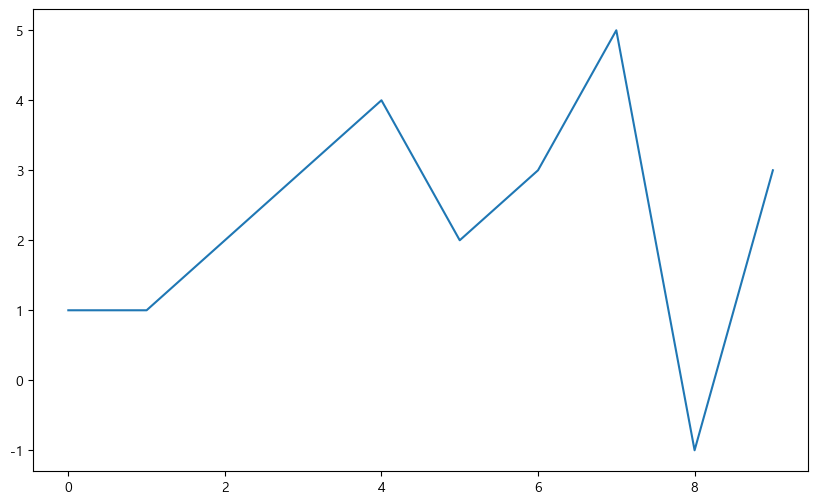

In [104]:
plt.figure(figsize = (10,6)) #도화지 설정
plt.plot([0,1,2,3,4,5,6,7,8,9], [1,1,2,3,4,2,3,5,-1,3])
plt.show()

#### 예제. 삼각함수 그래프 그리기

In [97]:
import numpy as np

t = np.arange(0,12,0.01)
y = np.sin(t)

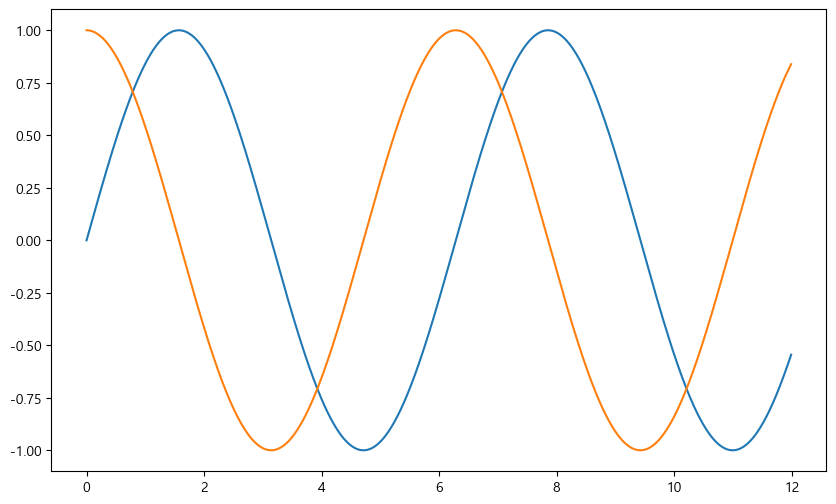

In [105]:
plt.figure(figsize = (10,6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.show()

- 1. 격자무늬 추가
- 2. 그래프 제목 추가
- 3. x축, y축 제목 추가
- 4. 주황색 파란색 선 데이터 의미 구분

In [107]:
def drawGraph():
    plt.figure(figsize = (10,6))
    plt.plot(t, np.sin(t))
    plt.plot(t, np.cos(t))
    plt.grid(True) #1. 격자무늬 추가
    plt.title("Example of sinwave") #2. 그래프 제목 추가
    plt.xlabel("time") #3. x축, y축 제목 추가
    plt.ylabel("Amitude")
    plt.legend(labels = ["sin", "cos"]) #4. 주황색 파란색 선 데이터 의미 구분
    '''
    plt.plot(t, np.sin(t), label = "sin")
    plt.plot(t, np.cos(t), label = "cos")
    이라 썼다면
    plt.legend() 로도 범례 생성 가능

    loc 옵션을 설정하여 범례 위치를 설정할 수 있음
    '''
    plt.show()

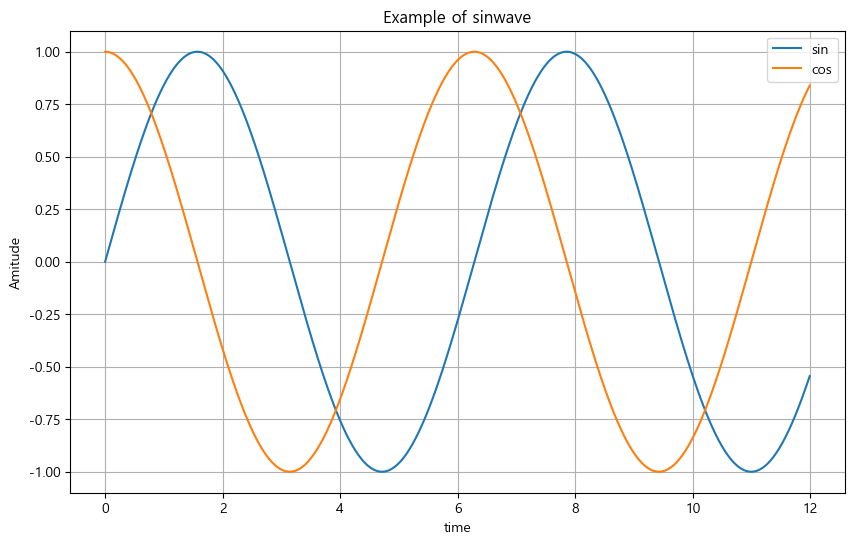

In [108]:
drawGraph()

#### 예제2. 그래프 커스텀

In [109]:
t = np.arange(0,5,0.5)
t

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

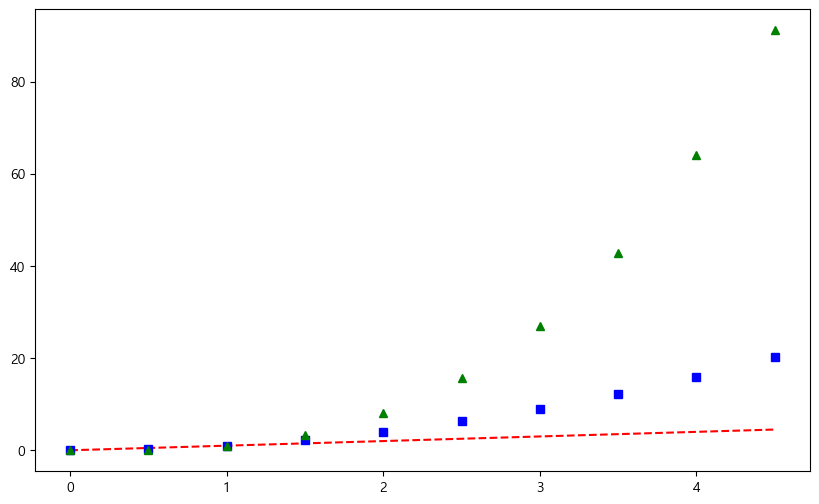

In [110]:
def drawGraph2():
    plt.figure(figsize = (10,6))
    plt.plot(t,t,"r--")
    plt.plot(t, t ** 2, "bs")
    plt.plot(t, t ** 3, "g^")
    plt.show()
drawGraph2()

In [111]:
t = list(range(0,7))
y = [1,4,5,8,9,5,3]

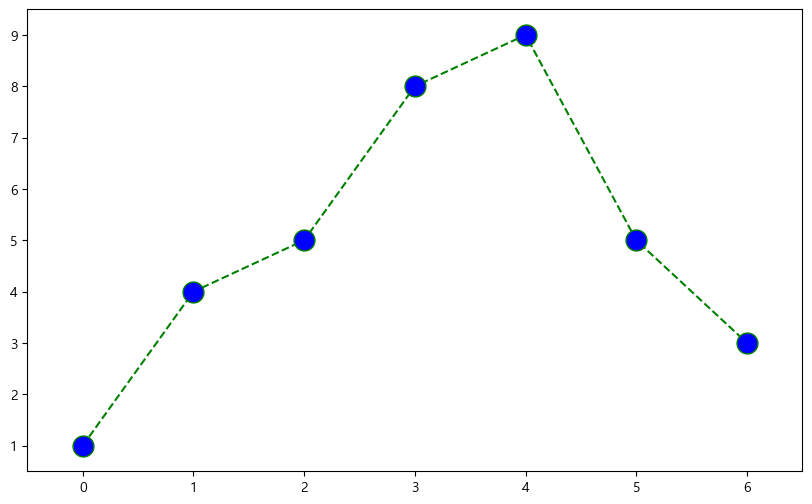

In [112]:
def drawGraph2_1():
    plt.figure(figsize = (10,6))
    plt.plot(
        t,
        y,
        color = "green",
        linestyle = "dashed",
        marker = "o",
        markerfacecolor = "blue",
        markersize = 15,
    )
    plt.xlim([-0.5,6.5])
    plt.ylim([0.5,9.5])
    plt.show()
drawGraph2_1():

#### 예제3. scatter plot

In [113]:
t = np.array([range(0,10)])
y = np.array([9,8,7,9,8,3,2,4,3,4])

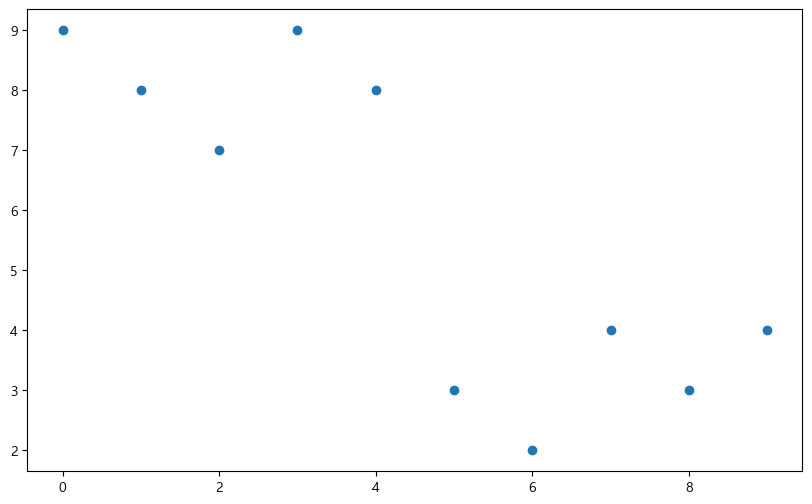

In [114]:
def drawGraph3():
    plt.figure(figsize = (10,6))
    plt.scatter(t,y)
    plt.show()
drawGraph3()

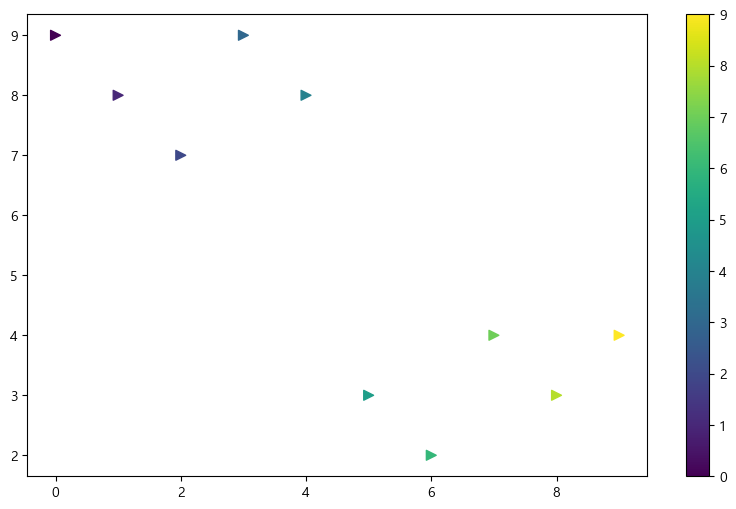

In [115]:
colormap = t

def drawGraph3():
    plt.figure(figsize = (10,6))
    plt.scatter(t,y, s = 50, c = colormap, marker = ">")
    plt.colorbar()
    plt.show()
drawGraph3()

#### 예제4. pandas에서 plot그리기
- matplotlib을 가져와서 사용

In [116]:
data_result.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
종로구,1980,165.171504,152212,141060,11152,28265,7.326623,18.569495,1.300817
용산구,2847,148.599138,232482,217756,14726,39478,6.334254,16.981100,1.224611
성동구,4047,52.852267,287240,280240,7000,48238,2.436986,16.793622,1.408926
광진구,3480,68.336425,350925,336801,14124,54854,4.024792,15.631260,0.991665
동대문구,2759,62.212389,354884,337574,17310,65154,4.877650,18.359239,0.777437


<Axes: xlabel='구별'>

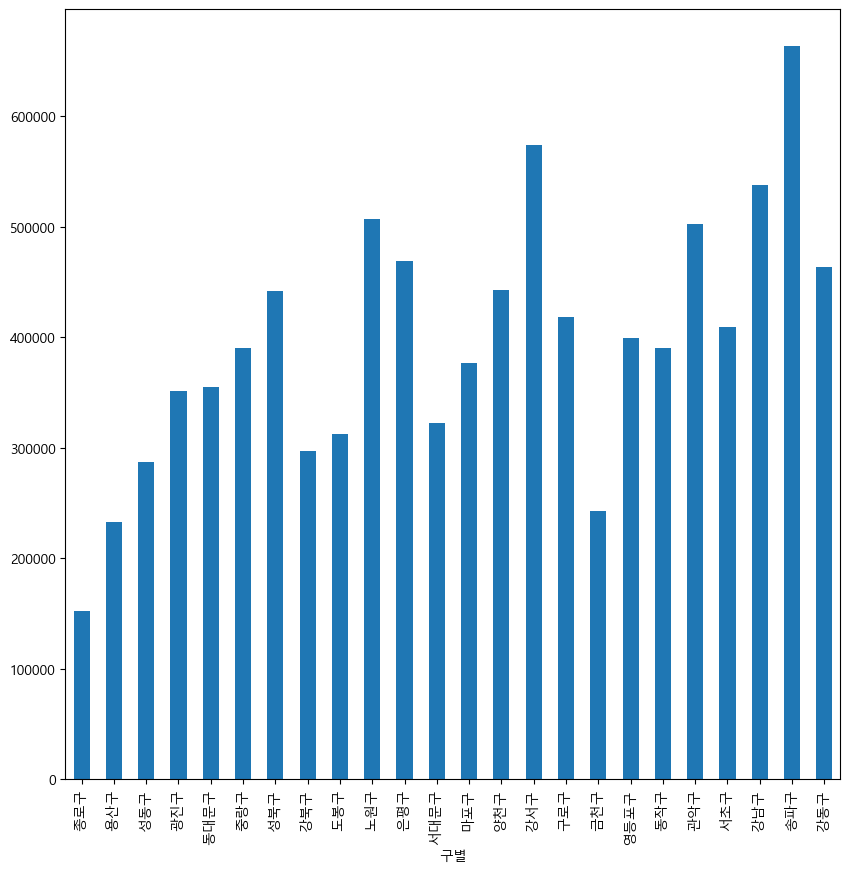

In [119]:
data_result["인구수"].plot(kind = "bar", figsize = (10,10))

<Axes: ylabel='구별'>

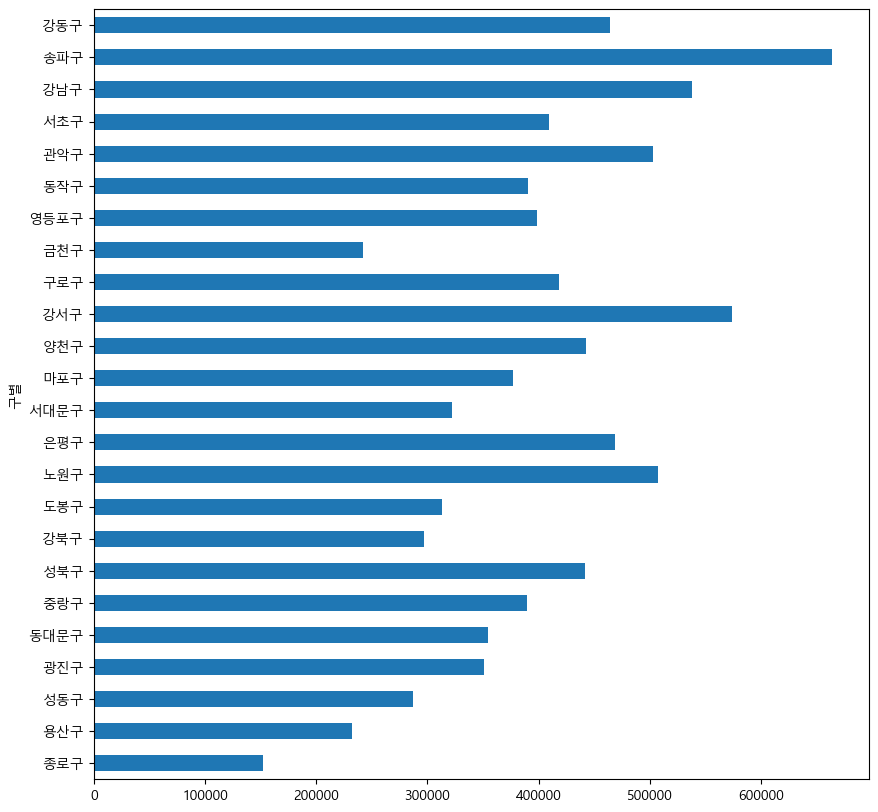

In [120]:
data_result["인구수"].plot(kind = "barh", figsize = (10,10))